# Summary plot for the mock kinematics data of axisymmetric IllustrisTNG ETGs

Xiangyu Huang

Access saved mock data and plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import corner
from copy import deepcopy

from cycler import cycler
import matplotlib as mpl
clist = ['#04B2D9', '#F2B33D', '#F29966', '#F2441D', '#0486C5']
mpl.rcParams['axes.prop_cycle'] = cycler(color=clist)

from deproject.Util.ellipticity import Axis_ratio2ellipticity

## Define plot function

### Corner plot for the mock data

In [2]:
def corner_plot_mock_data(data):
    
    data_plot = deepcopy(data)

    hist2dkwargs = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': clist[0], 'data_kwargs': {'ms': 5, 'alpha': 0.3}}

    # fig = corner.corner(data_plot.T,  labels=[r'$\theta_E$ [arcsec]', '$e$', r'$\sigma^P$ [km/s]' ,r'$i$ [deg]'], label_kwargs={'fontsize': 22}, **hist2dkwargs, hist_kwargs={'linewidth': 2, 'density' : True})

    fig = corner.corner(data_plot.T,  labels=[r'$\theta_E$', '$e$', r'$\sigma^P$' ,r'$i$'], label_kwargs={'fontsize': 30}, **hist2dkwargs, hist_kwargs={'linewidth': 2, 'density' : True})

    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=16)

    plt.plot([], [], color = clist[0], lw = 2, label = 'random projection')

    fig.legend(bbox_to_anchor=(0., 0.9, 0.93 ,0), fontsize=21, frameon=False)

    return fig

## With the Einstein radius cut

In [3]:
def corner_plot_with_cut(data, theta_e_cut):

    data_plot = deepcopy(data)

    hist2dkwargs = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': clist[0], 'data_kwargs': {'ms': 5, 'alpha': 0.3}}

    fig = corner.corner(data_plot.T,  labels=[r'$\theta_E$ [arcsec]', '$e$', r'$\sigma^P$ [km/s]' ,r'$i$ [deg]'], label_kwargs={'fontsize': 22}, **hist2dkwargs, hist_kwargs={'linewidth': 2, 'density' : True})

    # fig = corner.corner(data_plot.T,  labels=[r'$\theta_E$', '$e$', r'$\sigma^P$' ,r'$i$'], label_kwargs={'fontsize': 30}, **hist2dkwargs, hist_kwargs={'linewidth': 2, 'density' : True})

    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=16)

    theta_e_list = data_plot[0, :]
    ind = theta_e_list >= theta_e_cut
    cut_data = data_plot[:, ind]

    cut_hist2dkwargs = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': clist[2], 'data_kwargs': {'ms': 5, 'alpha': 0.3}}

    corner.corner(cut_data.T, fig=fig, **cut_hist2dkwargs, hist_kwargs={'linewidth': 2, 'density' : True})

    plt.plot([], [], color = clist[0], lw = 2, label = 'random projection')
    plt.plot([], [], color = clist[2], lw = 2, label = r'with $\theta_E \geq {}$ cut' .format(theta_e_cut))

    fig.legend(bbox_to_anchor=(0., 0.9, 0.93 ,0), fontsize=21, frameon=False)

    return fig

### Corner plot for oblate and prolate separately, no cut

In [4]:
def corner_plot_both_seperate(data_oblate, data_prolate):

    data_plot_oblate = deepcopy(data_oblate)
    data_plot_prolate = deepcopy(data_prolate)

    hist2dkwargs_oblate = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': clist[0], 'data_kwargs': {'ms': 5, 'alpha': 0.3}}

    fig = corner.corner(data_plot_oblate.T,  labels=[r'$\theta_E$ [arcsec]', '$e$', r'$\sigma^P$ [km/s]' ,r'$i$ [deg]'], label_kwargs={'fontsize': 24}, **hist2dkwargs_oblate, hist_kwargs={'linewidth': 2, 'density' : True})

    hist2dkwargs_prolate = {'plot_density':False, 'plot_contours':False, 'plot_datapoints': True, 'color': clist[2], 'data_kwargs': {'ms': 5, 'alpha': 0.2}}

    corner.corner(data_plot_prolate.T, fig=fig, **hist2dkwargs_prolate, hist_kwargs={'linewidth': 2, 'density' : True})

    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=16)

    plt.plot([], [], color = clist[0], lw = 2, label = 'oblate')
    plt.plot([], [], color = clist[2], lw = 2, label = 'prolate')

    fig.legend(bbox_to_anchor=(0., 0.9, 0.9 ,0), fontsize=22, frameon=False)

    return fig

## Access data

### The oblate sample

In [5]:
data_oblate = np.load('./tng_kin_oblate.npy')
# convert axis ratio to ellipticity
data_oblate[1, :] = Axis_ratio2ellipticity(data_oblate[1, :])
data_oblate = data_oblate[:4]

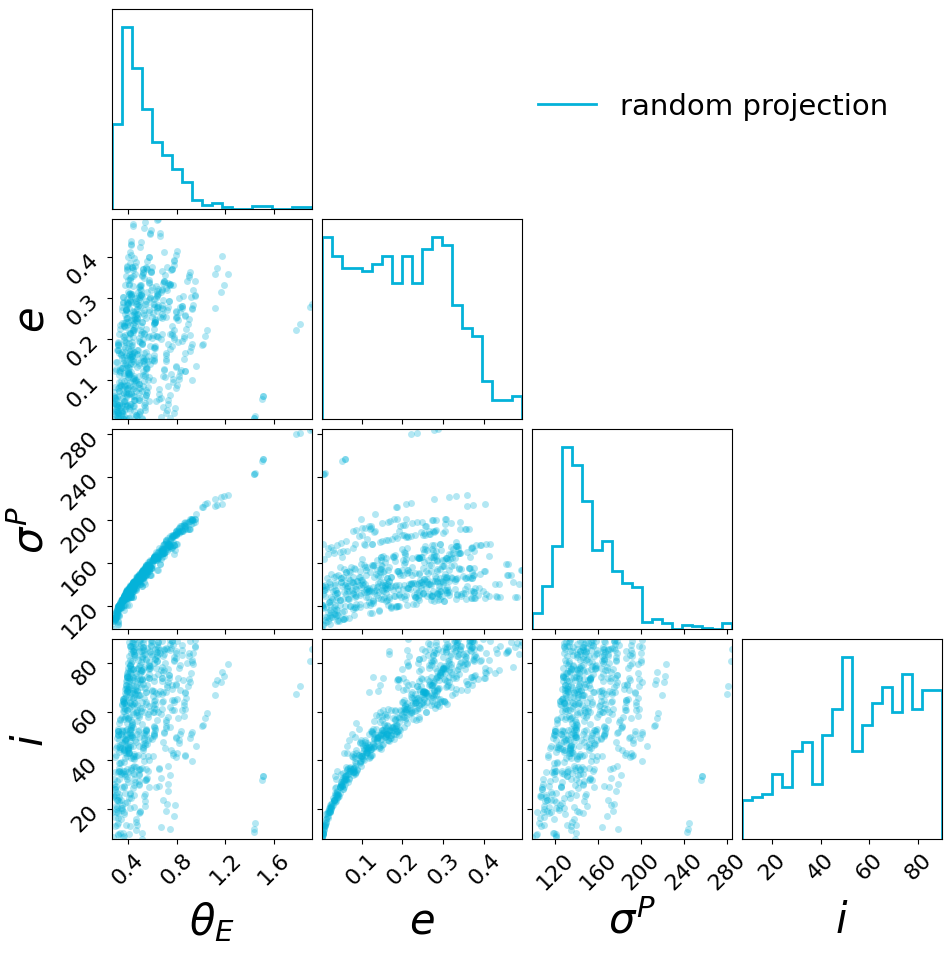

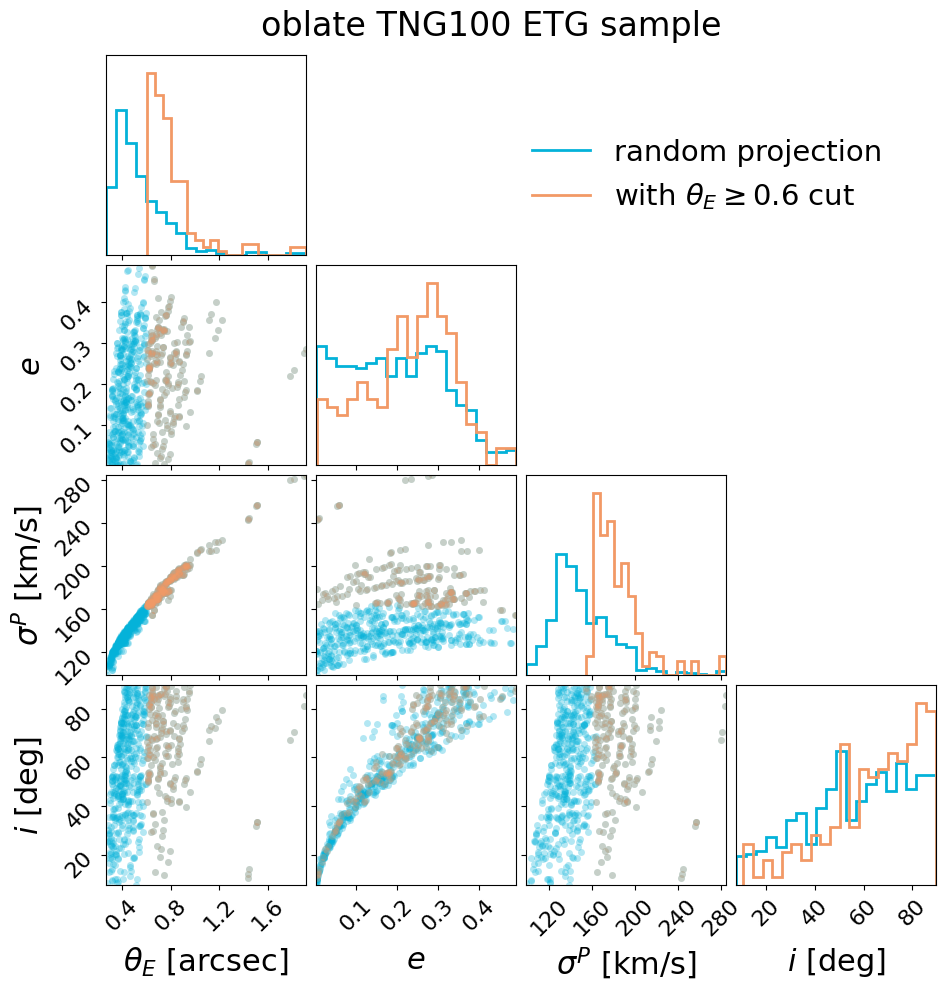

In [6]:
fig = corner_plot_mock_data(data_oblate)
fig = corner_plot_with_cut(data_oblate, 0.6)
fig.suptitle('oblate TNG100 ETG sample', size = 24, y=1.006)
# plt.savefig('./mock_kin_oblate.pdf', bbox_inches='tight', dpi=300)
plt.show()

### The prolate sample

In [7]:
data_prolate = np.load('./tng_kin_prolate.npy')
data_prolate[1, :] = Axis_ratio2ellipticity(1/data_prolate[1, :])
data_prolate = data_prolate[:4]

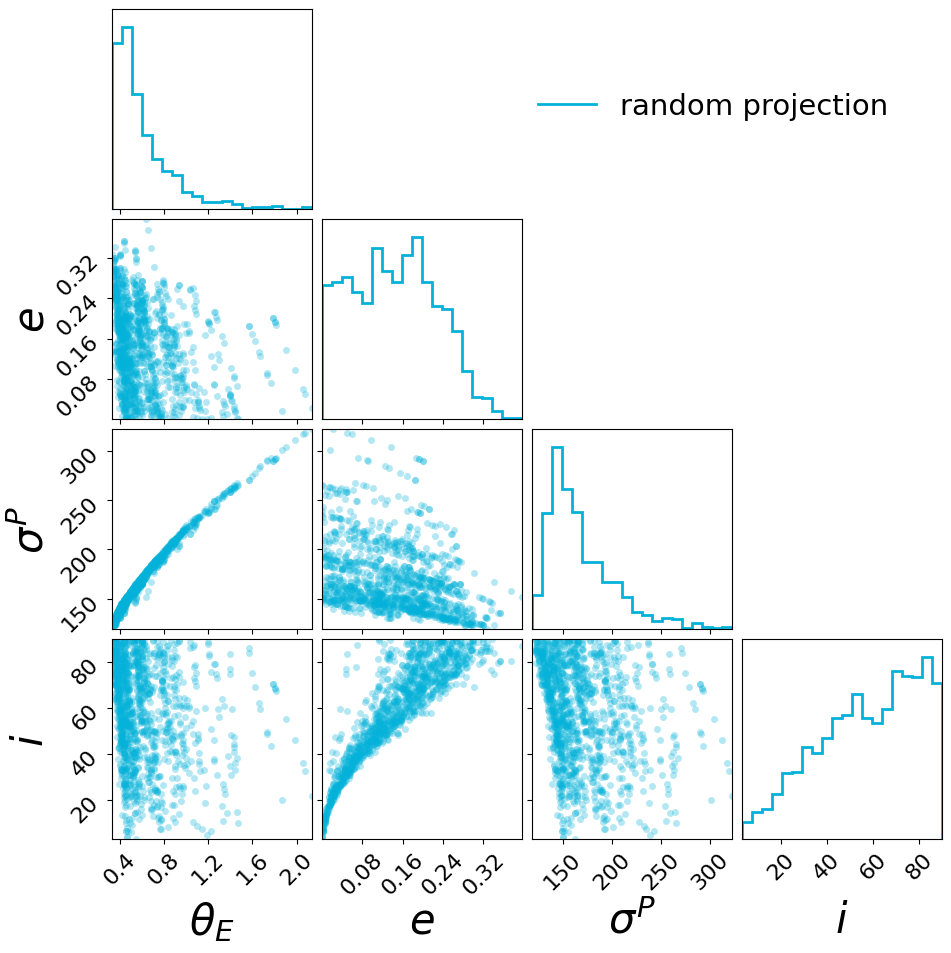

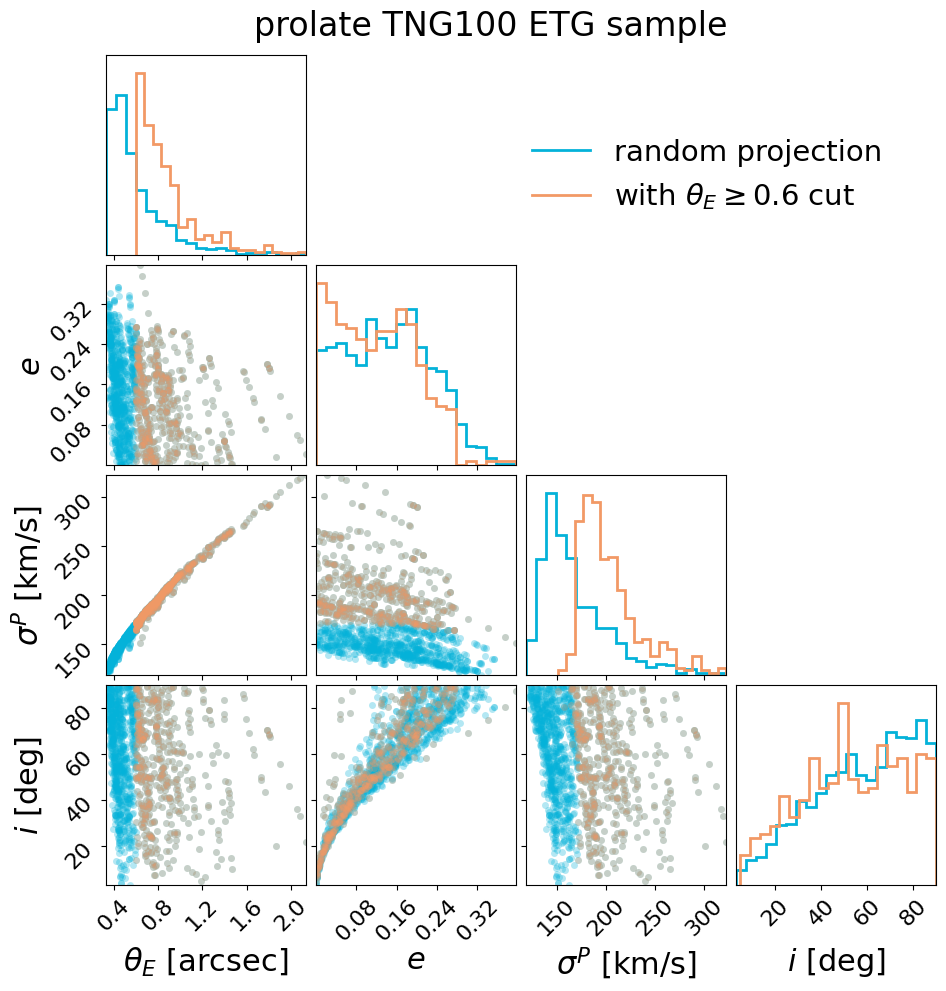

In [8]:
fig = corner_plot_mock_data(data_prolate)
fig = corner_plot_with_cut(data_prolate, 0.6)
fig.suptitle('prolate TNG100 ETG sample', size = 24, y=1.006)
# plt.savefig('./mock_kin_prolate.pdf', bbox_inches='tight', dpi=300)
plt.show()

### plotting the oblate andproalte sample together

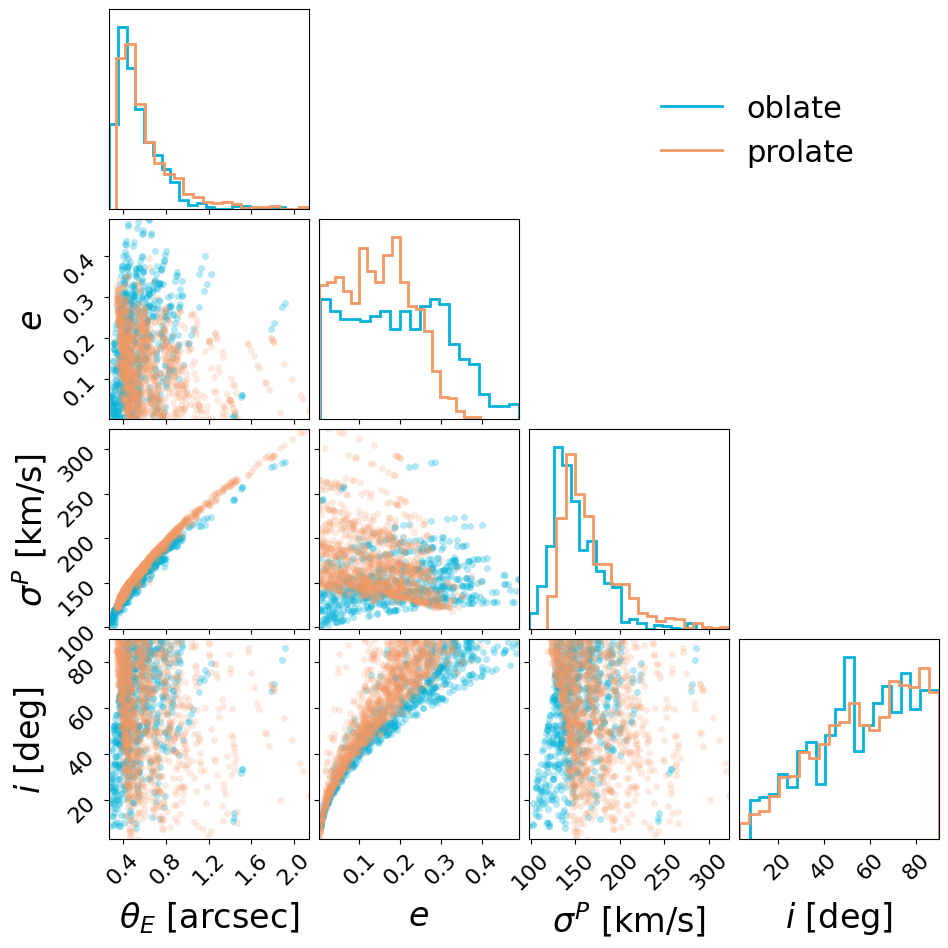

In [9]:
fig = corner_plot_both_seperate(data_oblate, data_prolate)
# plt.savefig('./mock_kin_data_all.pdf', bbox_inches='tight', dpi=300)
plt.show()